## Imports and Load

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('event_interview.csv')
df2 = pd.read_csv('fighter_interview.csv')
df3 = pd.read_csv('outcome_interview.csv')

# print (df1.head())
# print('')
# print (df2.head())
# print ('')
# print (df3.head())

## Merging Data and Concatenating 

In [2]:
# merge first fighter
fighter1df = df3[['fighter1_id']]
fighter1df = fighter1df.merge(right = df2, left_on = 'fighter1_id', right_on = 'id', how = 'left')
fighter1df = fighter1df[['name', 'nationality']]
fighter1df.rename(index=str, columns={"name": "fighter1_name", "nationality": "fighter1_nationality"}, inplace = True)

# merge second fighter 
fighter2df = df3[['fighter2_id']]
fighter2df = fighter2df.merge(right = df2, left_on = 'fighter2_id', right_on = 'id', how = 'left')
fighter2df = fighter2df[['name', 'nationality']]
fighter2df.rename(index=str, columns={"name": "fighter2_name", "nationality": "fighter2_nationality"}, inplace = True)

# merge event id
eventdf = df3[['event_id']]
eventdf = eventdf.merge(right = df1, left_on = 'event_id', right_on = 'id', how = 'left')
eventdf = eventdf[['name']]
eventdf.rename(index=str, columns={"name": "event_name"}, inplace = True)

# join all dfs into one
maindf = pd.concat([fighter1df, fighter2df, eventdf], axis=1)
# print (maindf.head())

maindf.to_csv('ResultDF.csv')


## Plot Counts of Fighters by Nationality


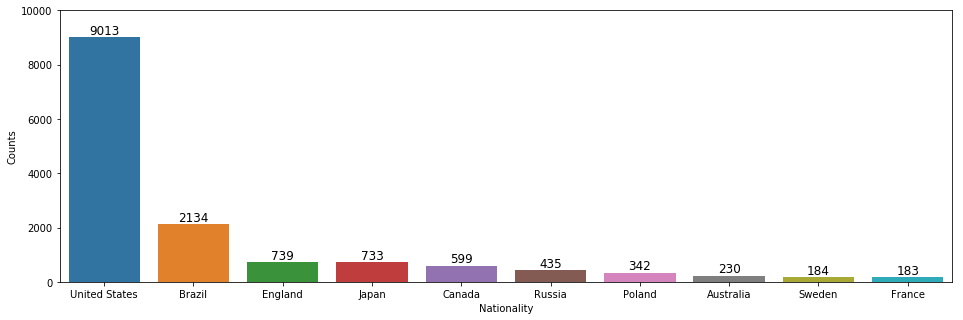

In [4]:
# visualisation

# put all fighters together, both fighter 1 and fighter 2. Same for nationality

visualdf = pd.concat([fighter1df,fighter2df.rename(columns={'fighter2_name':'fighter1_name', 'fighter2_nationality':'fighter1_nationality'})], ignore_index=True, sort = False)

# visualdf = visualdf['nationality'].value_counts().head(10)
# print (visualdf)

# Plot top ten nationalities 
plt.figure(figsize=(16, 5))
ax = sns.barplot(x=visualdf['fighter1_nationality'].value_counts().head(10).index, y=visualdf['fighter1_nationality'].value_counts().head(10))
y_max = visualdf['fighter1_nationality'].value_counts().max() 
ax.set_ylim([0, y_max + 1000])
ax.set(xlabel='Nationality', ylabel='Counts')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
